###Procesamiento de las Series de Tiempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/timeseries/

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/timeseries


In [ ]:
#Base de datos de municipio de Calamar-Colombia
df = pd.read_csv('Calamar.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27741 entries, 0 to 27740
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CodigoEstacion    27741 non-null  int64  
 1   NombreEstacion    27741 non-null  object 
 2   Latitud           27741 non-null  float64
 3   Longitud          27741 non-null  float64
 4   Altitud           27741 non-null  int64  
 5   Categoria         27741 non-null  object 
 6   Entidad           27741 non-null  object 
 7   AreaOperativa     27741 non-null  object 
 8   Departamento      27741 non-null  object 
 9   Municipio         27741 non-null  object 
 10  FechaInstalacion  27741 non-null  object 
 11  FechaSuspension   953 non-null    object 
 12  IdParametro       27741 non-null  object 
 13  Etiqueta          27741 non-null  object 
 14  DescripcionSerie  27741 non-null  object 
 15  Frecuencia        27741 non-null  object 
 16  Fecha             27741 non-null  object

In [ ]:
#Reconocer cuantos parametros podemos predecir en este caso la temperatura o el caudal
df.IdParametro.unique()

array(['CAUDAL', 'TEMPERATURA'], dtype=object)

In [ ]:
#Escogemos los datos que solo correspondan al Caudal
df=df[df.IdParametro == 'CAUDAL']
df

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-01 00:00,9266.000000,50,NaN,900
1,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-02 00:00,9130.000000,50,NaN,900
2,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-03 00:00,8926.000000,50,NaN,900
3,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-04 00:00,8705.000000,50,NaN,900
4,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,1950-01-05 00:00,8370.000000,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26783,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-19 00:00,3045.375000,50,NaN,900
26784,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-20 00:00,3057.234375,50,NaN,900
26785,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-21 00:00,3097.968750,50,NaN,900
26786,29037020,CALAMAR [29037020],10.253861,-74.911694,8,Limnimétrica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 02 - Atlántico-Bolivar-Sucre,Bolivar,Calamar,...,NaN,CAUDAL,Q_MEDIA_D,Caudal medio diario,Diaria,2024-02-22 00:00,3046.921875,50,NaN,900


In [ ]:
#Solo las columnas que vamos a necesitar son la fecha y el valor
df = df[['Fecha', 'Valor']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26788 entries, 0 to 26787
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fecha   26788 non-null  object 
 1   Valor   26788 non-null  float64
dtypes: float64(1), object(1)
memory usage: 627.8+ KB


In [ ]:
#Ordenar por fecha
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.sort_index(inplace=True)
df

<ipython-input-7-f6961827edf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fecha'] = pd.to_datetime(df['Fecha'])


,Fecha,Valor
0,1950-01-01,9266.000000
1,1950-01-02,9130.000000
2,1950-01-03,8926.000000
3,1950-01-04,8705.000000
4,1950-01-05,8370.000000
...,...,...
26783,2024-02-19,3045.375000
26784,2024-02-20,3057.234375
26785,2024-02-21,3097.968750
26786,2024-02-22,3046.921875


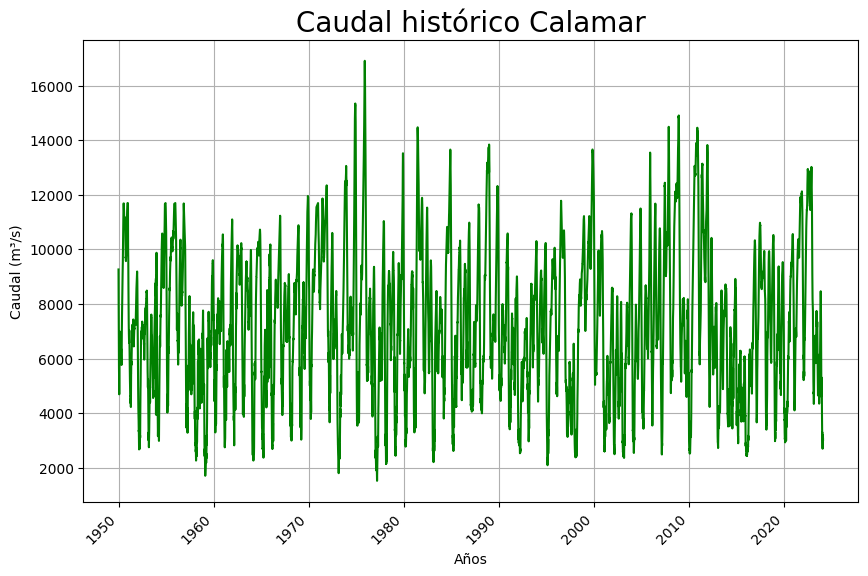

In [ ]:
#                                     Graficar los datos pero con respecto a Fecha en general
# Configurar el gráfico con fechas en el eje x
plt.figure(figsize = (10,6))
plt.plot(df['Fecha'], df['Valor'], color = 'green')

# Personalizar el formato de las fechas en el eje x (opcional)
plt.xticks(rotation=45, ha='right')  # Rotar las fechas para una mejor legibilidad
plt.title("Caudal histórico Calamar", fontsize = 20)
plt.xlabel("Años")
plt.ylabel("Caudal (m³/s)")
plt.grid()

# Mostrar el gráfico
plt.savefig("HistoricoCalamar")
plt.show()


In [ ]:
# Normalize the 'valor' column
scaler = MinMaxScaler(feature_range=(0, 1))
df['Valor_scaled'] = scaler.fit_transform(df['Valor'].values.reshape(-1, 1))
df

<ipython-input-9-5ae81cf543ed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Valor_scaled'] = scaler.fit_transform(df['Valor'].values.reshape(-1, 1))


,Fecha,Valor,Valor_scaled
0,1950-01-01,9266.000000,0.503216
1,1950-01-02,9130.000000,0.494381
2,1950-01-03,8926.000000,0.481128
3,1950-01-04,8705.000000,0.466771
4,1950-01-05,8370.000000,0.445007
...,...,...,...
26783,2024-02-19,3045.375000,0.099095
26784,2024-02-20,3057.234375,0.099866
26785,2024-02-21,3097.968750,0.102512
26786,2024-02-22,3046.921875,0.099196


In [ ]:
# Function to create sequences
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

In [ ]:
# Define sequence length (number of time steps to look back)
sequence_length = 10

# Create sequences
X, y = create_sequences(df['Valor_scaled'], sequence_length)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
# Reshape the input data to match the expected input shape of the LSTM model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping], verbose=1)

Epoch 1/100
603/603 [==============================] - 6s 7ms/step - loss: 0.0019 - val_loss: 6.0079e-04
Epoch 2/100
603/603 [==============================] - 5s 8ms/step - loss: 3.9697e-04 - val_loss: 1.6503e-04
Epoch 3/100
603/603 [==============================] - 4s 6ms/step - loss: 1.6993e-04 - val_loss: 7.0677e-05
Epoch 4/100
603/603 [==============================] - 4s 6ms/step - loss: 1.3332e-04 - val_loss: 6.3756e-05
Epoch 5/100
603/603 [==============================] - 4s 7ms/step - loss: 1.2565e-04 - val_loss: 5.8413e-05
Epoch 6/100
603/603 [==============================] - 4s 7ms/step - loss: 1.1294e-04 - val_loss: 3.5750e-05
Epoch 7/100
603/603 [==============================] - 4s 6ms/step - loss: 1.0747e-04 - val_loss: 4.4007e-05
Epoch 8/100
603/603 [==============================] - 4s 6ms/step - loss: 9.1307e-05 - val_loss: 2.8489e-05
Epoch 9/100
603/603 [==============================] - 5s 8ms/step - loss: 8.7444e-05 - val_loss: 2.3276e-05
Epoch 10/100
603/603 [=

In [ ]:
# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}, Test Loss: {test_loss}")

Train Loss: 5.704901195713319e-05, Test Loss: 3.6302499211160466e-05


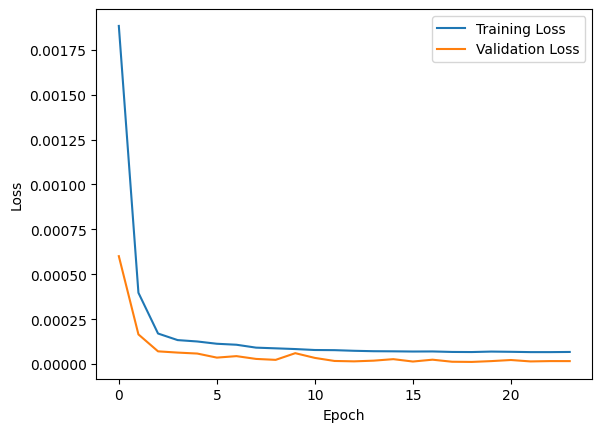

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

168/168 [==============================] - 1s 3ms/step


In [ ]:
# Inverse scaling to get the actual flow values
train_predict_actual = scaler.inverse_transform(train_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict_actual = scaler.inverse_transform(test_predict)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Convert the index of the test set to datetime
test_dates = df['Fecha'].iloc[-len(y_test):]

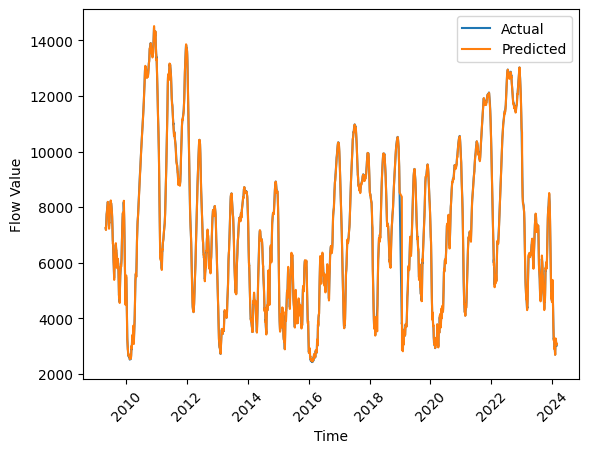

In [ ]:
# Plot predictions vs actual values for test set
plt.plot(test_dates, y_test_actual, label='Actual')
plt.plot(test_dates, test_predict_actual, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Flow Value')
plt.legend()
plt.xticks(rotation=45)
plt.show()

1/1 [==============================] - 0s 19ms/step


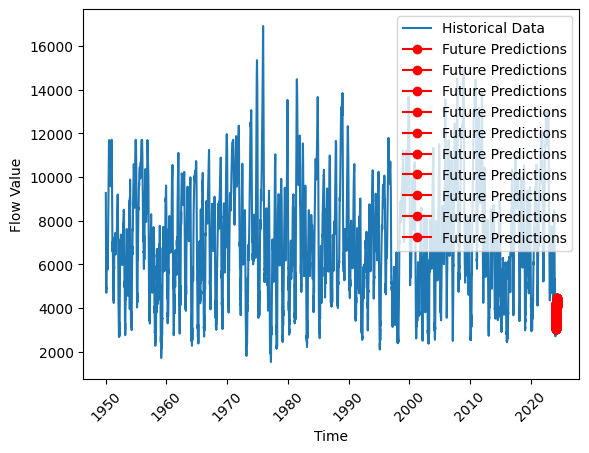

In [ ]:
# Number of future time points to predict (2 months * 30 days)
num_future_time_points = 60

# Prepare input sequences for future time points
future_input_sequences = []
last_sequence = X[-1]  # Last sequence from the dataset

for _ in range(num_future_time_points):
    # Reshape the last sequence to match the input shape of the model
    last_sequence_reshaped = last_sequence.reshape(1, sequence_length, 1)

    # Predict the next flow value
    next_flow_value_scaled = model.predict(last_sequence_reshaped)[0][0]

    # Append the predicted value to the last sequence
    last_sequence = np.append(last_sequence[1:], next_flow_value_scaled)

    # Append the updated last sequence to the list of future input sequences
    future_input_sequences.append(last_sequence)

# Inverse scaling to get the actual flow values
future_predictions_scaled = np.array(future_input_sequences)
future_predictions_actual = scaler.inverse_transform(future_predictions_scaled)

# Generate datetime index for future predictions
last_date = df['Fecha'].iloc[-1]
future_dates = pd.date_range(start=last_date, periods=num_future_time_points+1, freq='D')[1:]

# Plot future predictions
plt.plot(df['Fecha'], df['Valor'], label='Historical Data')
plt.plot(future_dates, future_predictions_actual, label='Future Predictions', marker='o', color='red')
plt.xlabel('Time')
plt.ylabel('Flow Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()


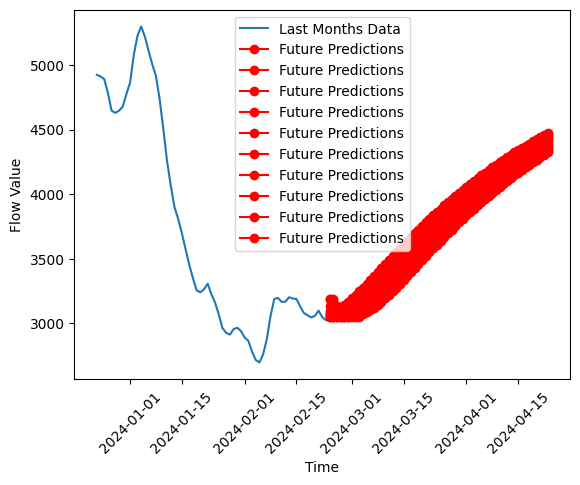

In [ ]:
# Calculate the date 3 months ago from the last date in the dataset
months_ago = df['Fecha'].iloc[-1] - pd.DateOffset(months=2)

# Select the last 3 months of historical data
months_data = df[df['Fecha'] >= months_ago]

# Plot last 3 months of historical data and future predictions
plt.plot(months_data['Fecha'], months_data['Valor'], label='Last Months Data')
plt.plot(future_dates, future_predictions_actual, label='Future Predictions', marker='o', color='red')
plt.xlabel('Time')
plt.ylabel('Flow Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [ ]:
model.save("flow_prediction_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
